# 時系列データの異常検知
総務省統計局の公開している「[家計調査（家計収支編）　時系列データ（二人以上の世帯）](https://www.stat.go.jp/data/kakei/longtime/index.html)」のデータを分析します。

参考文献：[経済産業省 鉱工業指数(生産・出荷・在庫、生産能力・稼働率)、製造工業生産予測指数 季節調整手法](https://www.meti.go.jp/statistics/tyo/iip/riyou-4.pdf)

In [1]:
import japanize_matplotlib as jm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data = pd.read_csv("./支出金額_加工済みデータ.csv", index_col="日付")
data.index = pd.to_datetime(data.index)
data.head(10)

,消費支出,傾向変動,傾向変動調整分,月,季節変動調整分
日付,,,,,
2000-01-01,105.629546,107.639411,97.990135,1,5.539775
2000-02-01,99.161881,107.530834,91.631047,2,7.053064
2000-03-01,114.404119,107.423056,106.981062,3,7.116344
2000-04-01,114.381944,107.316075,107.065868,4,9.897649
2000-05-01,105.269625,107.209887,98.059738,5,7.430118
2000-06-01,101.544867,107.104489,94.440378,6,7.189765
2000-07-01,111.381122,106.999877,104.381245,7,12.401256
2000-08-01,105.756457,106.896048,98.860409,8,6.583948
2000-09-01,101.138548,106.792998,94.345550,9,5.993986


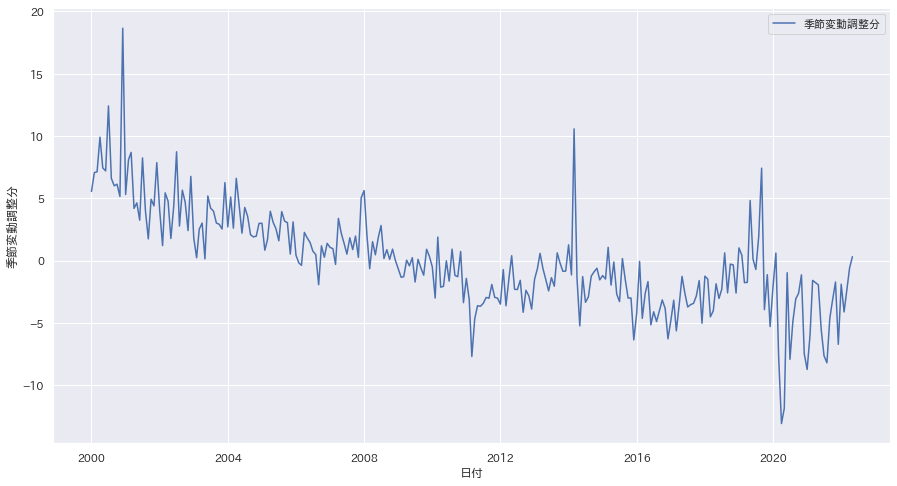

In [2]:
sns.set(rc={"figure.figsize": (15, 8)})
jm.japanize()
sns.lineplot(data=data, x="日付", y="季節変動調整分", label="季節変動調整分")
plt.show()

## 異常値を検出してみる
[DHI/tsod](https://github.com/DHI/tsod)を用いて異常値を検出してみます。

```
tsod: Anomaly Detection for time series data
Henrik Andersson, Rasmus Halvgaard, Laura Frøhlich, Jesper Mariegaard.
```

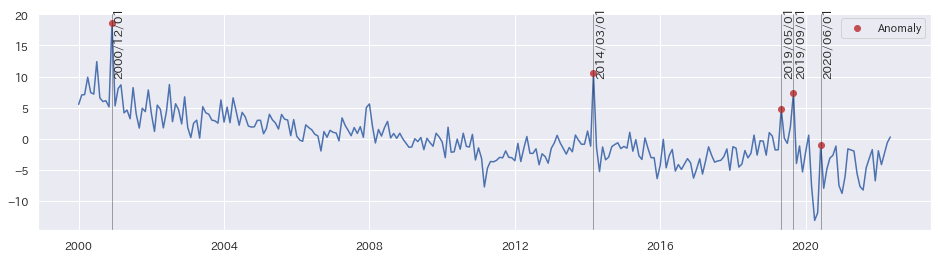

In [3]:
import tsod

magd = tsod.DiffDetector(direction="positive")
series = data["季節変動調整分"]
magd.fit(series[0:10])

res = magd.detect(series)
plt.figure(figsize=(16, 4))
plt.plot(series)
plt.plot(series[res], "ro", label="Anomaly")

for d in series[res].index:
    plt.axvline(d, alpha=0.5, linewidth=0.75, color="k")
    plt.text(
        d + pd.DateOffset(10),
        10,
        f'{d.strftime("%Y/%m/%d")}',
        rotation=90,
    )
plt.legend()
plt.show()

### ピークの点付近にあった出来事
#### 2000/12頃
> 日本経済は、2000年10月に(1)景気の山を越え、景気後退局面に入った。その後、2001年を通じて、生産は大幅に減少するとともに、失業率も既往最高水準を更新し、景気は悪化を続けた。（[経済財政白書／経済白書 > 平成14年度 年次経済財政報告](https://www5.cao.go.jp/j-j/wp/wp-je02/wp-je02-00101.html)）

#### 2014/03頃
[2014年の消費増税時を振り返る データから見えた消費への影響と小売店の対策とは？](https://gallery.intage.co.jp/zouzei2014/)

#### 2019/10頃
[2019年10月に消費税率は10％になりました。 | 財務省](https://www.mof.go.jp/tax_policy/summary/consumption/consumption_tax/index.html)

#### 2020/06頃
[都道府県をまたぐ移動、6月19日から全国的に緩和](https://car.watch.impress.co.jp/docs/news/1259775.html)